# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = w_0 + w_1 * x^n$$

to some cubic polynomial data with noise.

In [1]:
% matplotlib inline
import randomyh

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model, cross_validation

## Some helper functions
The following functions will generate data and polynomial values. Not all of them are used/useful..

In [20]:
def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()


def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

#constants to be used later: 
mu, sigma = 0, 0.1 # mean and standard deviation of noise 



test what the functions looks do: 

In [26]:
X = np.array(range(10))
print(polynomials(X, 3)) # each row is x raised to different powers
print(monomials(X, 5/2)) #  can you guess? 
generate_data(lambda x: x*x,0,2,10) # return x values and x^2 from 0->2 with 10 meshing

[[  0   0   0]
 [  1   1   1]
 [  2   4   8]
 [  3   9  27]
 [  4  16  64]
 [  5  25 125]
 [  6  36 216]
 [  7  49 343]
 [  8  64 512]
 [  9  81 729]]
[[   0.        ]
 [   1.        ]
 [   5.65685425]
 [  15.58845727]
 [  32.        ]
 [  55.90169944]
 [  88.18163074]
 [ 129.64181424]
 [ 181.01933598]
 [ 243.        ]]


[(0.02760663710623712, 0.0007621264123154682),
 (0.11495902627297672, 0.01321557772163095),
 (0.15981485787768301, 0.02554078879846402),
 (0.18430287327605477, 0.0339675490978095),
 (0.4758866816569354, 0.22646813377844935),
 (0.5203973995273032, 0.2708134534347797),
 (0.9358036591297276, 0.8757284884405875),
 (1.4230353801368076, 2.0250296931211085),
 (1.6380353776160412, 2.6831598983217266),
 (1.660336395739988, 2.756716947018854)]

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

### Let's generate the data that will be used in the fit  and plot it: 

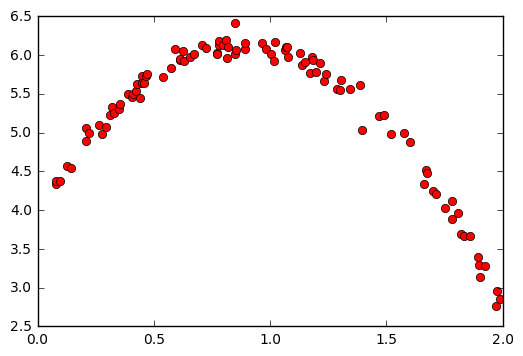

In [30]:
# Generate some data for the formula below
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f,0,2,100)
plt.plot(pd.DataFrame(data)[0],pd.DataFrame(data)[1],"ro") # can you think of a cleaner way of ploting this? :) 

In [52]:
def rmse(yh,h):
    return ???

def score_rms(model,x,y):
    # how does this related to cross_val_score ? 
    h=model.predict(x)
    return rmse(y,h)

def estimate_error_using_cv(data,model_n):
    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])
    X = monomials(domain, model_n) # since our model is w0+w1*x^n
    kfold =????# 8 way cross-validation, Can you guess why we are using KFold? 
    cv_errors=cross_validation.cross_val_score(????, X, Y, scoring=score_rms, cv=kfold)
    #print(cv_errors)
    return np.mean(cv_errors) #because of the way mean_squared_error is defined in scikit-learn 
    
def plot_data_and_model(data,model_n):
    #first fit the model: 
    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])
    X = monomials(domain, model_n) # since our model is w0+w1*x^n
    fitted_model=linear_model.LinearRegression().fit(X,Y) #using all data 
    print("for our model we have w=",fitted_model.coef_)
    plt.plot(pd.DataFrame(data)[0],fitted_model.predict(X),"b",pd.DataFrame(data)[0],pd.DataFrame(data)[1],"ro") # can you think of a cleaner way of ploting this? :) 

### Now let's experiment and make sure the #'s we are getting are ok: 

Things to medidate on:
    1. How can you *eyeball* the results from `estimate_error_using_cv` ?
    2. by walking thoughtthe models of different n's can you see which model is likely to be the best? 

for our model we have w= [ 0.         -0.53246138]


0.74006045465050807

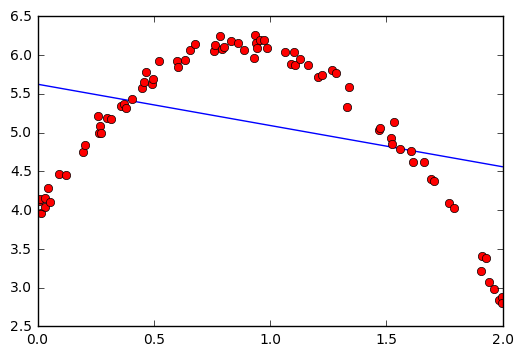

In [53]:
plot_data_and_model(data,model_n=1)
estimate_error_using_cv(data_cv,model_n=1)


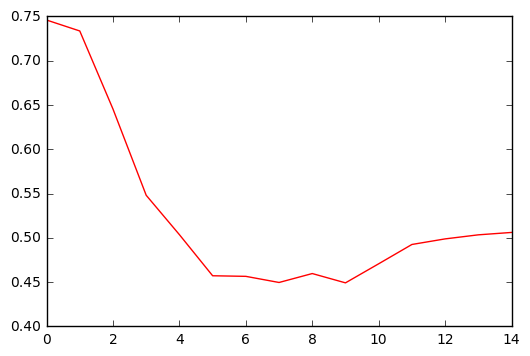

In [54]:
cv_res=pd.DataFrame([[deg, estimate_error_using_cv(data_cv,model_n=deg)] for deg in range(15) ])
plt.plot(cv_res[0],cv_res[1],'r') # the CV curve: 


# Lets Now Generate The non-CV curve  -- Potential HW (optional

Can you generate the blue curve? 